In [1]:
!pip install seaborn --quiet
!pip install matplotlib --quiet

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [3]:
df = pd.read_csv('hotel_booking.csv')

In [4]:
pd.set_option('display.max_columns',50)

In [5]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
4698,Resort Hotel,1,2,2016,March,14,28,2,5,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,35.14,0,0,Canceled,2016-03-26,Michelle Santiago,Michelle_Santiago@yandex.com,484-765-1081,************6092
58422,City Hotel,1,314,2016,October,42,12,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,21.0,NaN,68,Transient,75.00,0,0,Canceled,2016-06-28,Bradley Munoz,BradleyMunoz@outlook.com,664-969-1131,************1658
25487,Resort Hotel,0,157,2016,June,26,23,2,5,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,243.0,NaN,0,Contract,53.85,0,1,Check-Out,2016-06-30,Hailey Freeman,Hailey_F@verizon.com,164-132-0921,************3155
70750,City Hotel,1,270,2017,June,25,21,2,4,2,0.0,0,BB,NLD,Direct,Direct,0,0,0,A,A,1,No Deposit,14.0,NaN,0,Transient,105.00,0,0,Canceled,2017-02-02,Nicholas Chang,Chang_Nicholas@yandex.com,962-461-2035,************7719
12072,Resort Hotel,1,167,2017,June,24,11,2,3,1,0.0,0,BB,RUS,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,101.00,0,2,Canceled,2017-02-07,Daniel Watkins,Watkins.Daniel@xfinity.com,742-327-2893,************8002


In [6]:
df.shape

(119390, 36)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
country_mode = df['country'].mode()

In [12]:
df['country'].fillna(country_mode[0],inplace = True)

In [13]:
df.drop(columns = ['agent','company'],inplace = True)

In [14]:
df['children'].fillna(0,inplace = True)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


# Exploratory Data Analysis (EDA)

In [17]:
df_reserved = df[df['is_canceled'] == 0]

## "Monthly Guest Count: Tracking the Number of Guests Each Month"

In [18]:
df['month_number'] = pd.to_datetime(df['arrival_date_month'], format='%B').dt.month #Add new column 'month_number'

In [19]:
city_hotel = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)] # Seperate 'City Hotels'

In [20]:
resort_hotel = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)] # Seperate 'Resort Hotels'

In [21]:
city_hotel_month_booking = city_hotel.groupby(['arrival_date_month','month_number'],as_index = False)[['arrival_date_day_of_month']].count().rename(columns = {'arrival_date_month' : 'month_name',"arrival_date_day_of_month":'total_booking'}).sort_values(['month_number']).reset_index(drop = True)

In [22]:
resort_hotel_month_booking = resort_hotel.groupby(['arrival_date_month','month_number'],as_index = False)[['arrival_date_day_of_month']].count().rename(columns = {'arrival_date_month' : 'month_name',"arrival_date_day_of_month":'total_booking'}).sort_values(['month_number']).reset_index(drop = True)

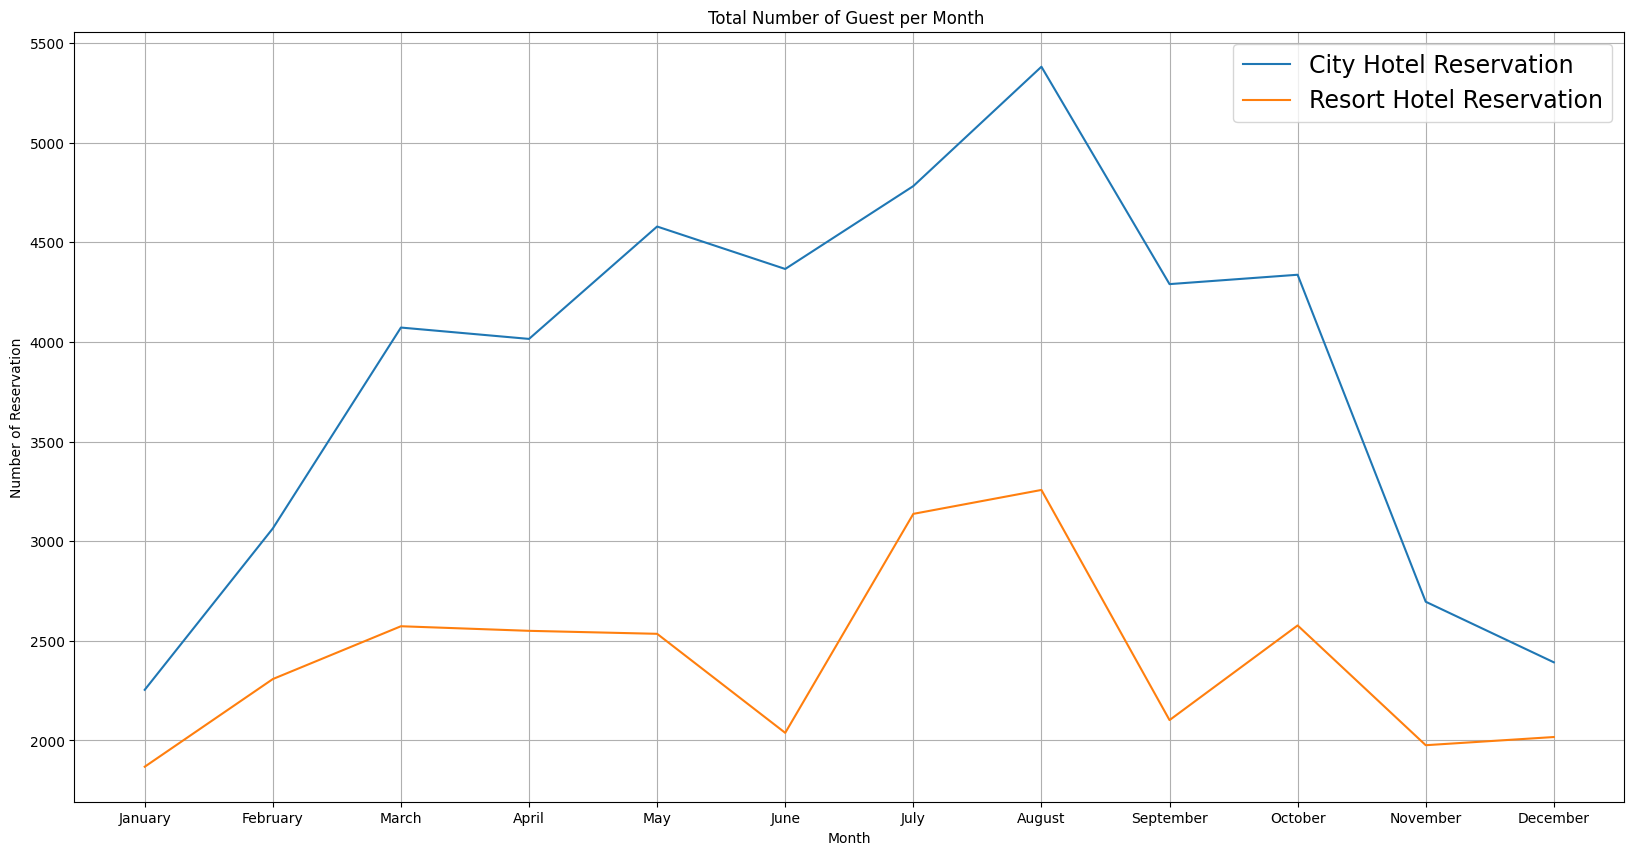

In [23]:
plt.figure(figsize = (20,10))
plt.plot(city_hotel_month_booking['month_name'],city_hotel_month_booking['total_booking'],label = 'City Hotel Reservation')
plt.plot(resort_hotel_month_booking['month_name'],resort_hotel_month_booking['total_booking'],label = 'Resort Hotel Reservation')
plt.title('Total Number of Guest per Month ')
plt.legend(fontsize = 17)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Number of Reservation')
plt.show()

- **The graph highlights August as the peak booking month for both city and resort hotels**
- **As winter approaches after October, bookings decline, reflecting seasonal changes in travel preferences and demand.**
- **Taking advantage of the hot summer period can optimize business performance and revenue generation for hotels.**

## Monthly Average Daily Rates (adr)

In [24]:
city_hotel_adr = city_hotel.groupby(['arrival_date_month','month_number'],as_index = False)[['adr']].mean().rename(columns = {'arrival_date_month':'month_name'}).sort_values(['month_number'])

In [25]:
resort_hotel_adr = resort_hotel.groupby(['arrival_date_month','month_number'],as_index = False)[['adr']].mean().rename(columns = {'arrival_date_month':'month_name'}).sort_values(['month_number'])

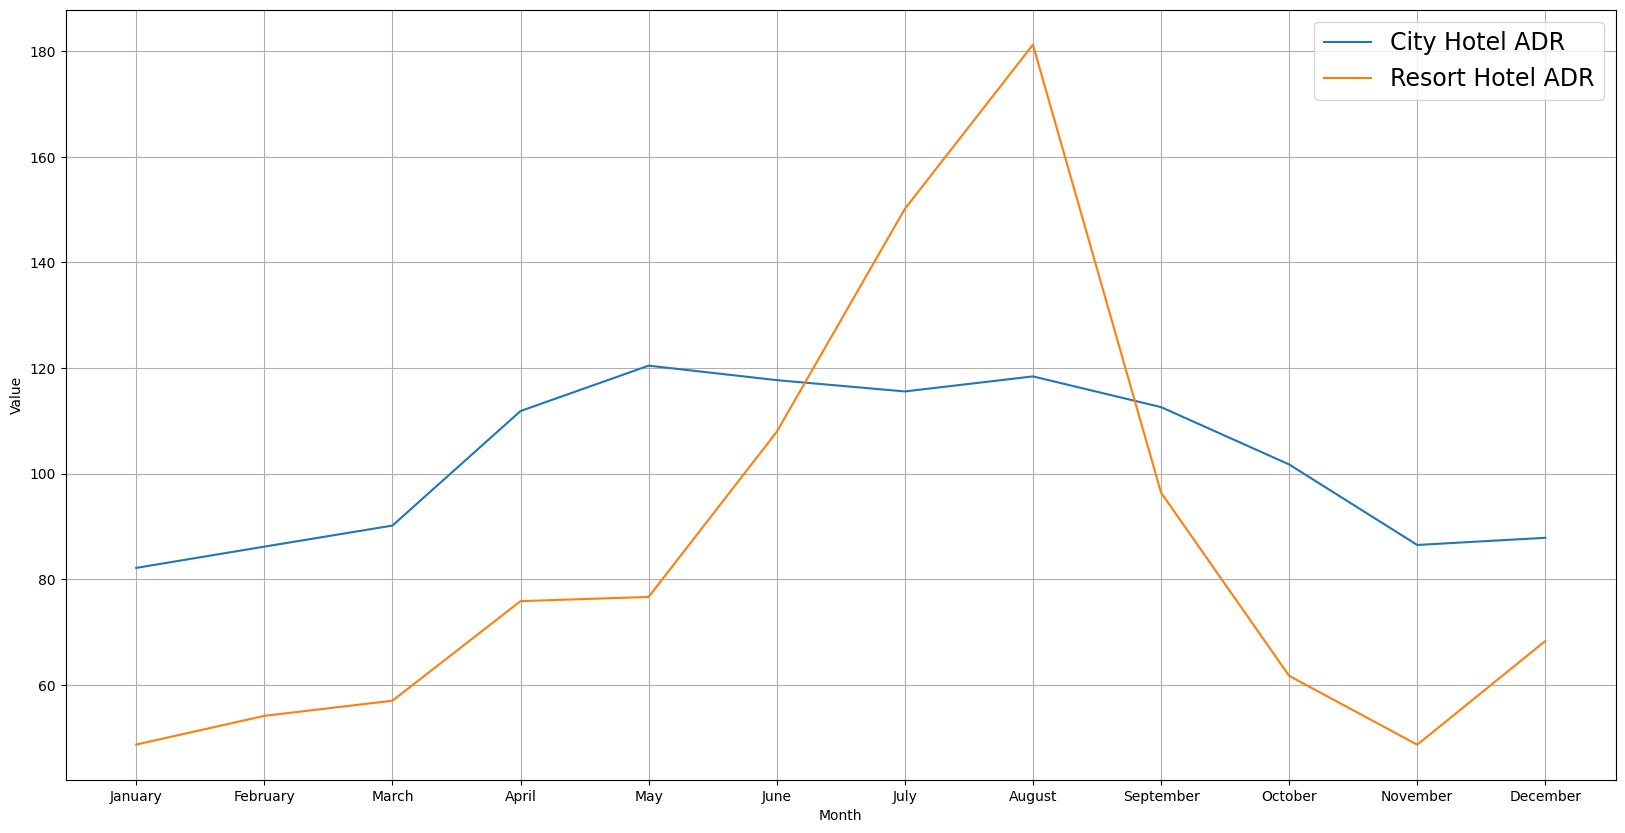

In [26]:
plt.figure(figsize = (20,10))
plt.plot(city_hotel_adr['month_name'],city_hotel_adr['adr'],label = 'City Hotel ADR')
plt.plot(resort_hotel_adr['month_name'],resort_hotel_adr['adr'],label = 'Resort Hotel ADR')
plt.legend(fontsize = 17)
plt.grid()
plt.xlabel('Month')
plt.ylabel('Value')
plt.show()

**The average daily rate (ADR) is so high during summer time. Due to high demand in summer season.**


## Market Segment

In [27]:
market_segment_city_hotel = city_hotel.groupby('market_segment',as_index = False)[['hotel']].count().rename(columns = {'hotel':"reserved"}).sort_values(['reserved'],ascending = False).reset_index(drop=True)

In [28]:
market_segment_resort_hotel = resort_hotel.groupby('market_segment',as_index = False)[['hotel']].count().rename(columns = {'hotel':"reserved"}).sort_values(['reserved'],ascending = False).reset_index(drop=True)

In [29]:
market_segment_city_hotel

,market_segment,reserved
0,Online TA,24257
1,Offline TA/TO,9574
2,Direct,5037
3,Groups,4352
4,Corporate,2345
5,Complementary,478
6,Aviation,185


In [30]:
market_segment_resort_hotel

,market_segment,reserved
0,Online TA,11481
1,Offline TA/TO,6334
2,Direct,5635
3,Groups,3362
4,Corporate,1958
5,Complementary,168


**The online travel agency is very helpful for reservations at both hotels. And we also got the highest number of bookings for it.**

## Repeated Guest Percentage

In [31]:
repeated_percent = round(df[df['is_canceled'] == 0]['is_repeated_guest'].value_counts(normalize = True) *100,2)

In [32]:
print(f'New Guests :- {repeated_percent[0]}%')
print(f'Repeated Guests :- {repeated_percent[1]}%')

New Guests :- 95.67%
Repeated Guests :- 4.33%


**As we see, only 4.3% of our guests are repeat guests**


## Most Reserved Room Type

In [33]:
room_type_percent = df['reserved_room_type'].value_counts(normalize = True)*100

In [34]:
room_type_percent = pd.DataFrame(room_type_percent).reset_index()

In [35]:
room_type_percent.rename(columns = {'index':'room_type','reserved_room_type':'booking_share'},inplace = True)

In [36]:
adr_room_type = df.groupby('reserved_room_type',as_index = False)[['adr']].mean()

In [37]:
room_type_percent = pd.merge(room_type_percent,adr_room_type,'left',left_on = 'room_type',right_on = 'reserved_room_type')

In [38]:
room_type_percent = room_type_percent[['room_type','booking_share','adr']]

In [39]:
room_type_percent

,room_type,booking_share,adr
0,A,72.027808,90.796658
1,D,16.082586,120.682882
2,E,5.473658,124.540179
3,F,2.426501,167.689651
4,G,1.753916,175.996027
5,B,0.936427,90.360447
6,C,0.780635,160.216792
7,H,0.503392,188.223111
8,P,0.010051,0.000000
9,L,0.005026,124.666667


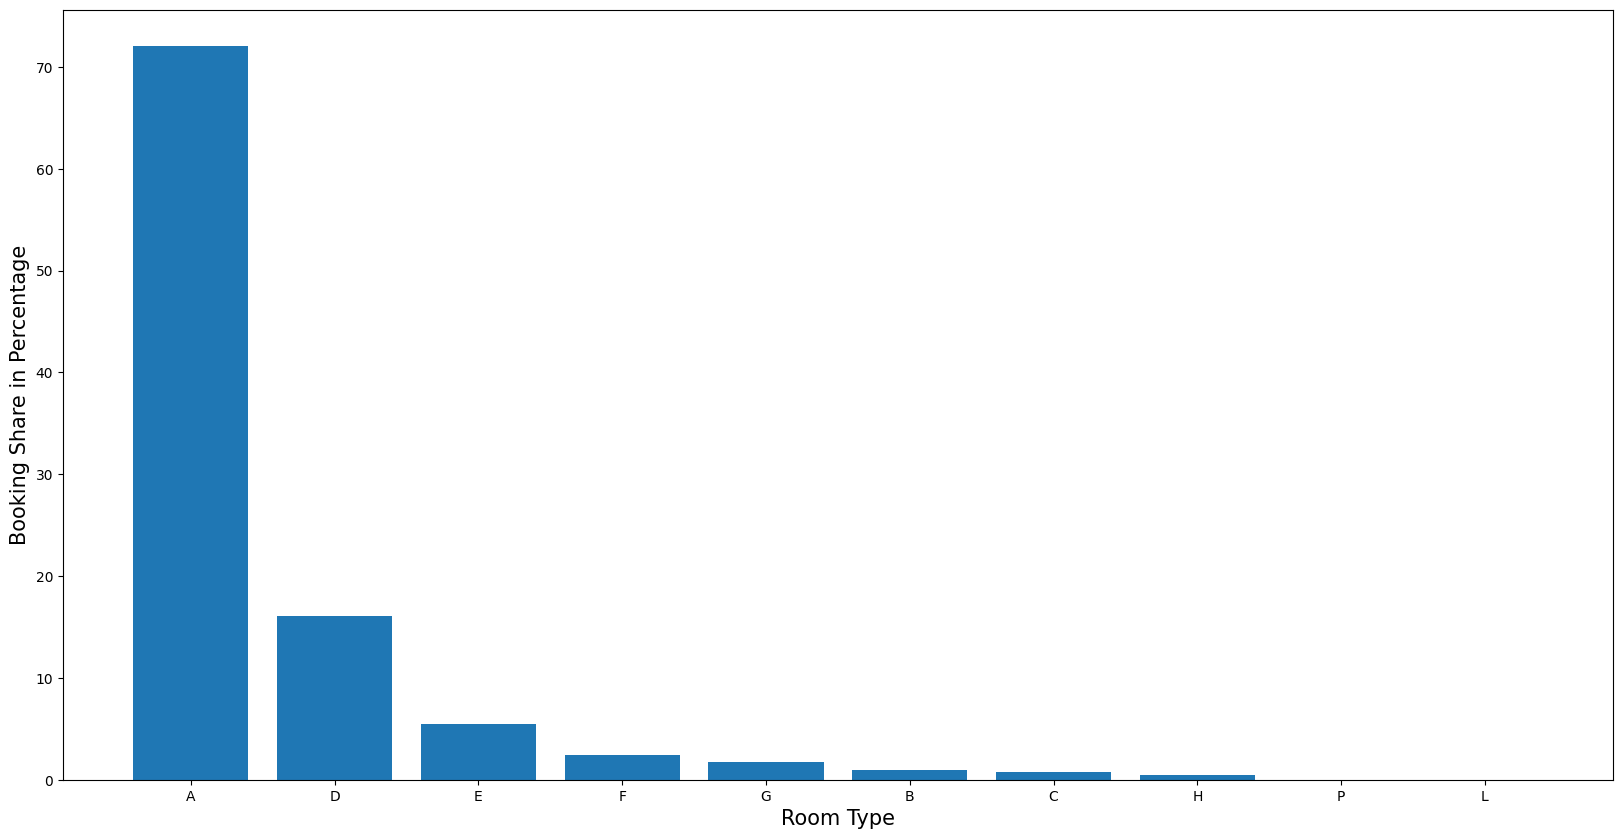

In [40]:
plt.figure(figsize = (20,10))
plt.bar(room_type_percent['room_type'],room_type_percent['booking_share'])
plt.xlabel('Room Type',fontsize = 15)
plt.ylabel('Booking Share in Percentage',fontsize = 15)
plt.show()

**Demand for 'A' type rooms is high in our hotels**

## Customer Type

In [41]:
customer_type = round(df_reserved['customer_type'].value_counts(normalize = True)*100,2)

In [42]:
customer_type = pd.DataFrame(customer_type).reset_index()

In [43]:
customer_type.rename(columns = {'index' : 'customer_type','customer_type':'percentage'},inplace = True)

In [44]:
customer_type

,customer_type,percentage
0,Transient,70.64
1,Transient-Party,24.92
2,Contract,3.74
3,Group,0.69


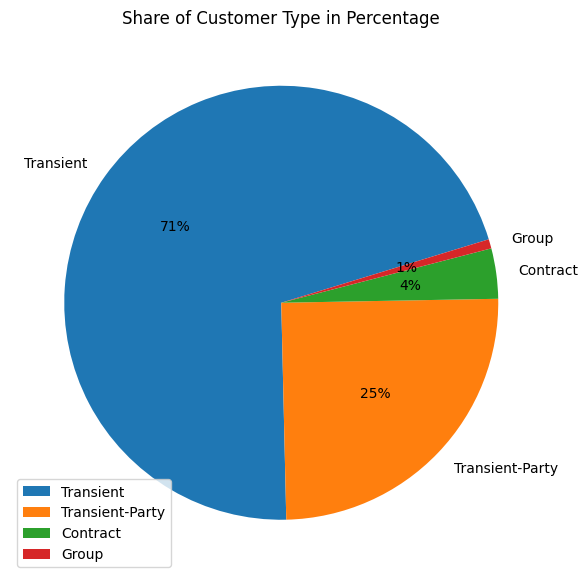

In [45]:
plt.figure(figsize = (7,10))
plt.pie(customer_type['percentage'],labels = customer_type['customer_type'],startangle = 17,autopct = '%1.f%%')
plt.title('Share of Customer Type in Percentage')
plt.legend()
plt.show()

## Car Parking Space

In [46]:
car_parking_space = df[['required_car_parking_spaces']].value_counts()

In [47]:
car_parking_space

required_car_parking_spaces
0                              111974
1                                7383
2                                  28
3                                   3
8                                   2
dtype: int64

## Reservation Possiblities Percentage

In [48]:
reservation_percent = round(df['is_canceled'].value_counts(normalize = True) * 100,2)

In [49]:
reservation_percent

0    62.96
1    37.04
Name: is_canceled, dtype: float64

In [50]:
print(f'No Cancellation :- {reservation_percent[0]}')
print(f'Cancellation :- {reservation_percent[1]}')

No Cancellation :- 62.96
Cancellation :- 37.04


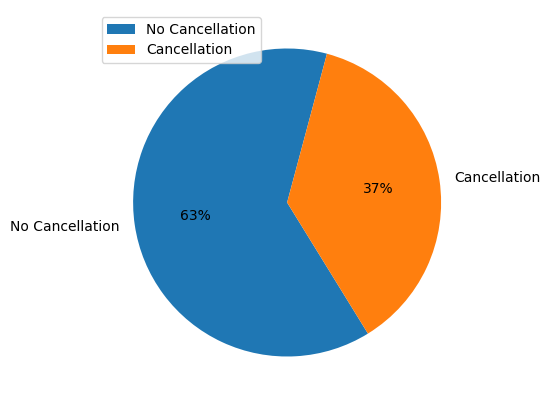

In [51]:
plt.figure(figsize = (10,5))
plt.pie(reservation_percent,autopct = '%1.f%%',startangle = 75,labels = ['No Cancellation','Cancellation'])
plt.legend()
plt.show()

**In the above graph we easily seen that our cancellation rate is too high approx 37%**
    